### Stock Market Prediction Using LSTM

In [84]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas_datareader as pdr

In [85]:
# Data Collection
df = pd.read_csv('AAPL.csv')

In [86]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [87]:
df1 = df.reset_index()['close']

In [88]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [89]:
df1.shape

(1258,)

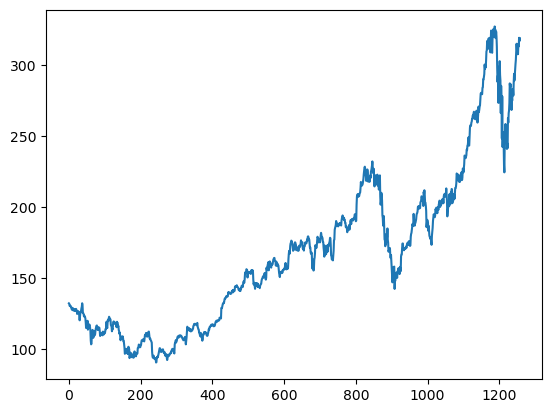

In [90]:
plt.plot(df1)

In [91]:
# LSTM is sensitive to scale the data. So we apply MinMax Scaler

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [93]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [94]:
df1.shape

(1258, 1)

In [95]:
# Splitting data into train split and test split
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size

In [96]:
training_size,test_size

(880, 378)

In [97]:
train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1),:1]

In [98]:
print(len(train_data))
print(len(test_data))

880
378


In [99]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [] , []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]    ## i=0 ---> 0,1,2,3--------99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [100]:
# reshape into X = t,t+1,t+2,t+3 and Y = t+4
time_step = 100
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)

In [101]:
print(X_train.shape) 
print(y_train.shape)

(779, 100)
(779,)


In [102]:
print(X_test.shape) 
print(y_test.shape)

(277, 100)
(277,)


In [103]:
# Reshape input to [samples, timesteps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [104]:
# Create the LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [105]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
          epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 14s 383ms/step - loss: 0.0159 - val_loss: 0.0651
Epoch 2/100
13/13 [==============================] - 3s 207ms/step - loss: 0.0033 - val_loss: 0.0104
Epoch 3/100
13/13 [==============================] - 3s 236ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 4/100
13/13 [==============================] - 3s 244ms/step - loss: 8.3330e-04 - val_loss: 0.0046
Epoch 5/100
13/13 [==============================] - 3s 255ms/step - loss: 7.6104e-04 - val_loss: 0.0048
Epoch 6/100
13/13 [==============================] - 3s 270ms/step - loss: 7.1688e-04 - val_loss: 0.0049
Epoch 7/100
13/13 [==============================] - 3s 212ms/step - loss: 6.9539e-04 - val_loss: 0.0057
Epoch 8/100
13/13 [==============================] - 3s 265ms/step - loss: 7.0364e-04 - val_loss: 0.0058
Epoch 9/100
13/13 [==============================] - 4s 334ms/step - loss: 7.0045e-04 - val_loss: 0.0054
Epoch 10/100
13/13 [==============================] - 4s 274ms/ste

13/13 [==============================] - 3s 267ms/step - loss: 2.3826e-04 - val_loss: 0.0012
Epoch 79/100
13/13 [==============================] - 5s 342ms/step - loss: 2.5925e-04 - val_loss: 0.0010
Epoch 80/100
13/13 [==============================] - 5s 400ms/step - loss: 2.0994e-04 - val_loss: 0.0012
Epoch 81/100
13/13 [==============================] - 5s 371ms/step - loss: 1.9959e-04 - val_loss: 9.6890e-04
Epoch 82/100
13/13 [==============================] - 5s 389ms/step - loss: 2.3118e-04 - val_loss: 0.0024
Epoch 83/100
13/13 [==============================] - 3s 248ms/step - loss: 2.0840e-04 - val_loss: 0.0015
Epoch 84/100
13/13 [==============================] - 5s 413ms/step - loss: 2.2404e-04 - val_loss: 0.0011
Epoch 85/100
13/13 [==============================] - 5s 397ms/step - loss: 2.4243e-04 - val_loss: 0.0011
Epoch 86/100
13/13 [==============================] - 4s 314ms/step - loss: 2.0140e-04 - val_loss: 9.9778e-04
Epoch 87/100
13/13 [==============================]

In [108]:
# Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 42ms/step


In [109]:
# Transform back to original form (Inverse transform)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [110]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

150.9545240165103

In [111]:
# Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

248.77403832723002

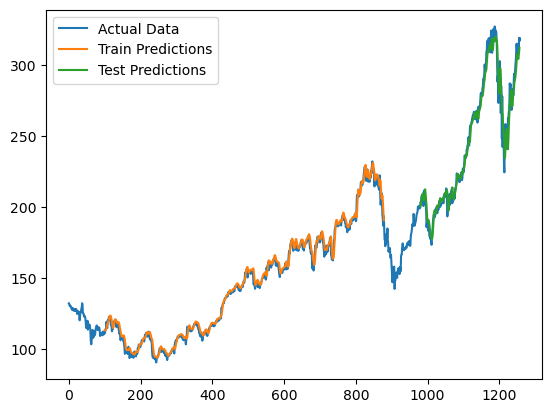

In [118]:
# Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict

# shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df1)-1, :] = test_predict

# plot base line and predictions
plt.plot(scaler.inverse_transform(df1), label = 'Actual Data')
plt.plot(trainPredictPlot, label = "Train Predictions")
plt.plot(testPredictPlot, label = 'Test Predictions')
plt.legend()
plt.show()